#Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd

#Data Collection and Analysis
I collected the datasets from kaggle, the link is [PIMA Indians Diabetes Datasets](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Here we defined the 0 and 1 as,

0 --> Non-Diabetic

1 --> Diabetic

In [7]:
diabetes_dataset.groupby('Outcome')

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#Data Visualization

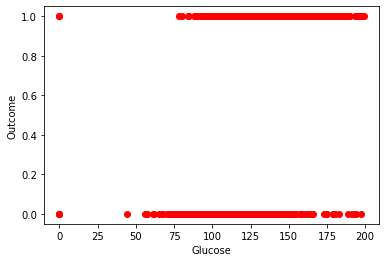

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.scatter(diabetes_dataset['Glucose'], Y, color = "red")
plt.show()

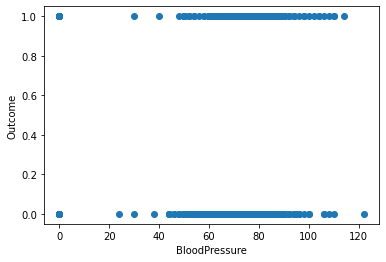

In [13]:
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.scatter(diabetes_dataset['BloodPressure'], Y)

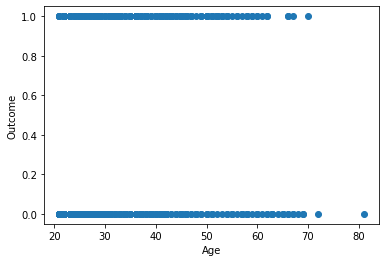

In [14]:
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.scatter(diabetes_dataset['Age'], Y)

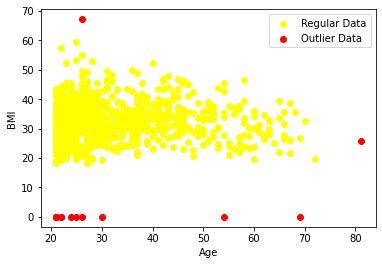

In [15]:
plt.xlabel('Age')
plt.ylabel('BMI')
age_regular_df = diabetes_dataset[(diabetes_dataset['Age'] <= 75) & (diabetes_dataset['BMI'] <= 60) & (diabetes_dataset['BMI'] >= 10)];
age_outlier_df = diabetes_dataset[(diabetes_dataset['Age'] > 75) | (diabetes_dataset['BMI'] > 60) | (diabetes_dataset['BMI'] < 10)];
plt.scatter(age_regular_df['Age'], age_regular_df['BMI'], color = 'yellow', label = 'Regular Data')
plt.scatter(age_outlier_df['Age'], age_outlier_df['BMI'], color = 'red', label = 'Outlier Data')
plt.legend()
plt.show()

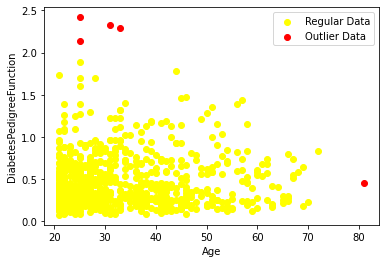

In [16]:
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
regular_df = diabetes_dataset[(diabetes_dataset['Age'] <= 75) & (diabetes_dataset['DiabetesPedigreeFunction'] <= 2)];
outlier_df = diabetes_dataset[(diabetes_dataset['Age'] > 75) | (diabetes_dataset['DiabetesPedigreeFunction'] > 2)];
plt.scatter(regular_df['Age'], regular_df['DiabetesPedigreeFunction'], color = 'yellow', label = 'Regular Data')
plt.scatter(outlier_df['Age'], outlier_df['DiabetesPedigreeFunction'], color = 'red', label = 'Outlier Data')
plt.legend()
plt.show()

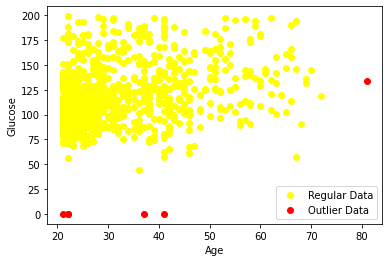

In [17]:
plt.xlabel('Age')
plt.ylabel('Glucose')
regular_df = diabetes_dataset[(diabetes_dataset['Age'] <= 75) & (diabetes_dataset['Glucose'] >= 25)];
outlier_df = diabetes_dataset[(diabetes_dataset['Age'] > 75) | (diabetes_dataset['Glucose'] < 25)];
plt.scatter(regular_df['Age'], regular_df['Glucose'], color = 'yellow', label = 'Regular Data')
plt.scatter(outlier_df['Age'], outlier_df['Glucose'], color = 'red', label = 'Outlier Data')
plt.legend()
plt.show()

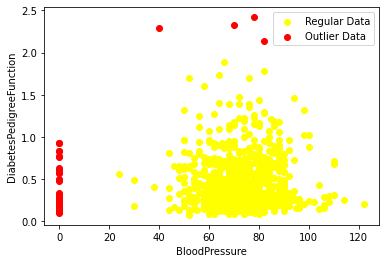

In [18]:
plt.xlabel('BloodPressure')
plt.ylabel('DiabetesPedigreeFunction')
regular_df = diabetes_dataset[(diabetes_dataset['BloodPressure'] >= 20) & (diabetes_dataset['DiabetesPedigreeFunction'] <= 2)];
outlier_df = diabetes_dataset[(diabetes_dataset['BloodPressure'] < 20) | (diabetes_dataset['DiabetesPedigreeFunction'] > 2)];
plt.scatter(regular_df['BloodPressure'], regular_df['DiabetesPedigreeFunction'], color = 'yellow', label = 'Regular Data')
plt.scatter(outlier_df['BloodPressure'], outlier_df['DiabetesPedigreeFunction'], color = 'red', label = 'Outlier Data')
plt.legend()
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

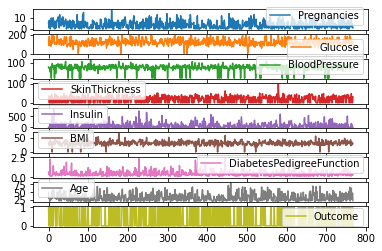

In [19]:
diabetes_dataset.plot.line(subplots=True)

#Data Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
standardized_data = scaler.fit_transform(X)

In [22]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [23]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [24]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#Standardized Vs Non-Standardized Data

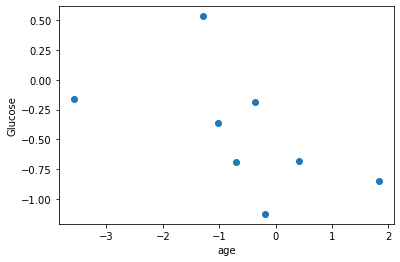

In [25]:
plt.xlabel('age')
plt.ylabel('Glucose')
plt.scatter(X[7], X[1], label = 'Standardized')

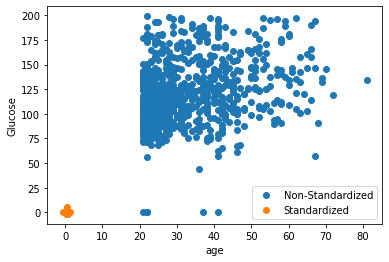

In [26]:
plt.xlabel('age')
plt.ylabel('Glucose')
plt.scatter(diabetes_dataset['Age'], diabetes_dataset['Glucose'], label = 'Non-Standardized')
plt.scatter(X[0], X[4], label = 'Standardized')
plt.legend(loc = 'best')
plt.show()

#K-Fold Cross Validation

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [28]:
def get_score(model, X_train, X_test, y_train, y_test) :  
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [29]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [30]:
scores_logistic = []
scores_svm = []
scores_rf = []

In [31]:
for train_index, test_index in folds.split(X,Y):

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]

    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test)) 

    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=60), X_train, X_test, y_train, y_test))

In [32]:
scores_logistic

[0.76953125, 0.7421875, 0.80078125]

In [33]:
scores_svm

[0.75390625, 0.76171875, 0.80078125]

In [34]:
scores_rf

[0.7265625, 0.7734375, 0.77734375]

In [35]:
def Average(lst):
    return sum(lst) / len(lst)

In [36]:
print("Average accuracy of Logistic Regression : ", Average(scores_logistic))
print("Average accuracy of Support Vector Machine : ", Average(scores_svm))
print("Average accuracy of Random Forest : ", Average(scores_rf))

Average accuracy of Logistic Regression :  0.7708333333333334
Average accuracy of Support Vector Machine :  0.7721354166666666
Average accuracy of Random Forest :  0.7591145833333334


In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
cross_val_score(SVC(C = 5), X, Y, cv = 3)

array([0.7421875 , 0.74609375, 0.8125    ])

In [39]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, Y, cv=3)

array([0.76953125, 0.7421875 , 0.80078125])

In [40]:
cross_val_score(RandomForestClassifier(n_estimators = 40), X, Y, cv=3)

array([0.74609375, 0.76171875, 0.79296875])

#Train-Test-Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=10)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


#Confusion Matrix

In [43]:
classifier = SVC()
classifier.fit(X_train, Y_train)
y_predicted = classifier.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
cm

array([[88, 12],
       [21, 33]], dtype=int64)

Text(69.0, 0.5, 'Truth')

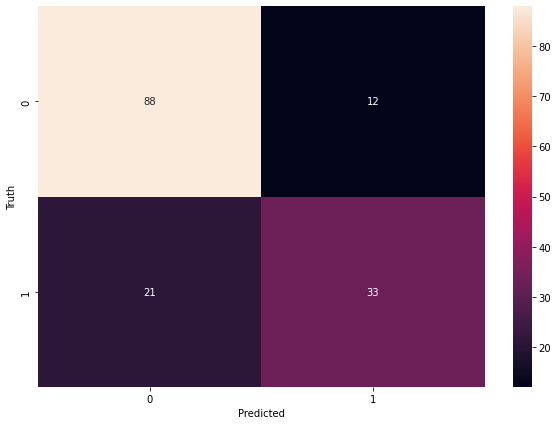

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Making a Predictive System

In [46]:
input_data = (5,166,72,19,175,25.8,0.587,51)


input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


std_data = scaler.transform(input_data_reshaped)
print(std_data)

classifier = SVC(kernel = 'linear')
classifier.fit(X, Y)

prediction = classifier.predict(std_data)
#print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
The person is diabetic


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Saving the trained Model

In [47]:
import pickle

In [48]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [49]:
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [50]:
input_data = (5,166,72,19,175,25.8,0.587,51)


input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = classifier.predict(std_data)
#print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
